# Python Machine Learning 2 - Classification (`1`)

<p><a name="sections"></a></p>


## Sections

- <a href="#classification">Classification Problems</a><br>
- <a href="#logistic">Logistic Regression</a><br>
    - <a href="#gradient">Gradient Discent</a><br>
- <a href="#logistic-sklearn">Logistic Regression in Scikit-Learn</a><br>
    - <a href="#logistic-multi">Logistic Regression with Multiple Variables</a><br>
        - <a href="#ex1">Exercise 1</a><br>
    - <a href="#classes">Logistic Regression with More than Two Classes</a><br>
        - <a href="#ex2">Exercise 2</a><br>
- <a href="#discriminant">Discriminant Analysis</a><br>
    - <a href="#bayes">Bayes Theorem</a><br>
    - <a href="#theory">Discriminant Analysis: Basic Theories</a><br>
    - <a href="#bayes_classifier">Bayes Classifier</a><br>
- <a href="#models">Discriminant Analysis: Models</a><br>
    - <a href="#oneD">One Dimensional Cases</a><br>
    - <a href="#highD">Higher Dimensional Cases</a><br>
        - <a href="#highG">Higher Dimensional Gaussian Distribution</a><br>
        - <a href="#highM">Models is Higher Dimension</a><br>
- <a href="#discriminant-sklearn">Discriminant Analysis in Scikit-Learn</a><br>
    - <a href="#ex3">Exercise 3</a><br>
    - <a href="#ex4">Exercise 4</a><br>
- <a href="#nb">Naive Bayes</a><br>
    - <a href="#gnb">Gaussian Naive Bayes</a><br>
    - <a href="#gnb-sklearn">Gaussian Naive Bayes in Scikit Learn</a><br>
    - <a href="#mnb">Multinomial Naive Bayes</a><br>
    - <a href="#wmnb">Working Example of Multinomial Naive Bayes</a><br>
    - <a href="#mnb-sklearn">Multinomial Naive Bayes in Scikit Learn</a><br>
    - <a href="#bnb">Bernoulli Naive Bayes</a><br>
    - <a href="#bnb-sklearn">Bernoulli Naive Bayes in Scikit Learn</a><br>

<p><a name="classification"></a></p>
## Classification Problems

- Categorical (qualitative) variables: takes values in a finite set (usually unordered).

  - email: {spam, non-spam}
  - blood type: {A, B, AB, O}
  - tumor: {malignant, benign}

- Classification: given a feature (or a set of features), we want to predict categorical outputs.

- Sometime people are also interested in estimating the probabilities that X belongs to each category.


**A Classification Example**

- We want to predict whether a tumor is maligant or benign based on the size

- The output is binary: 
  - 0: benign
  - 1: malignant

- Here is a simulated data set:

In [1]:
"""
Load tumor dataset
"""
from __future__ import print_function
import pandas as pd
# give the path to the file 
path_to_file = "./data/pml2tumor.csv"
data = pd.read_csv(path_to_file)
print(data.shape)
data.head()

(12, 2)


,Size,Malignant
0,3.788628,0
1,2.436510,0
2,2.096497,0
3,0.136507,0
4,1.722612,0


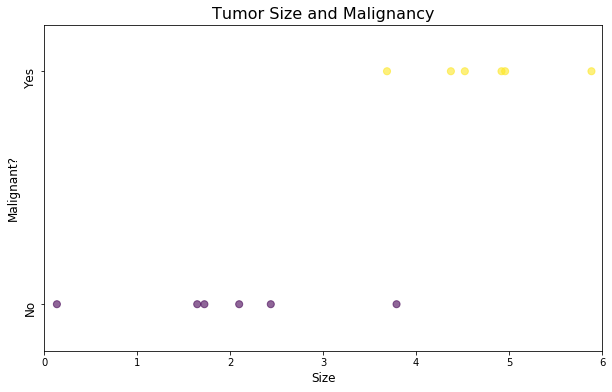

In [4]:
"""
Visualization the tumor dataset
"""
import numpy as np
import matplotlib.pyplot as plt

## function to make a 1d plot
def data_1Dplot(x, y, xlabel=None, ylabel=None, labels=None, title=None):
    ## scatter plot the data
    plt.scatter(x, y, c=y, s=50, alpha=0.6)
    ## set labels
    if not xlabel is None:
        plt.xlabel(xlabel, size=12)
    if not ylabel is None:
        plt.ylabel(ylabel, size=12)
    ## set ticks for y
    y_ticks = np.unique(y)
    if not labels is None:
        plt.yticks(y_ticks, labels, \
                   rotation='vertical', size=12)
    ## set title
    if not title is None:
        plt.title(title, size=16)
        
## feature x_tm and output x_tm
x_tm = data[["Size"]]
y_tm = data["Malignant"]
## Plot data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm, y_tm, \
            xlabel="Size", ylabel="Malignant?", \
            labels=["No", "Yes"], \
            title="Tumor Size and Malignancy")
## Set plot range
plt.axis([0,6, -.2, 1.2])
plt.show()

Question: Can we use simple linear regression?

**Can we use Linear Regression?**

- Let's fit a linear regression model with the simulated tumor data and visualize your fitted line with the data points.

In [6]:
"""
Fit a linear model.
"""
from sklearn import linear_model
lm_1 = linear_model.LinearRegression()
## Fit a linear model
lm_1.fit(x_tm, y_tm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

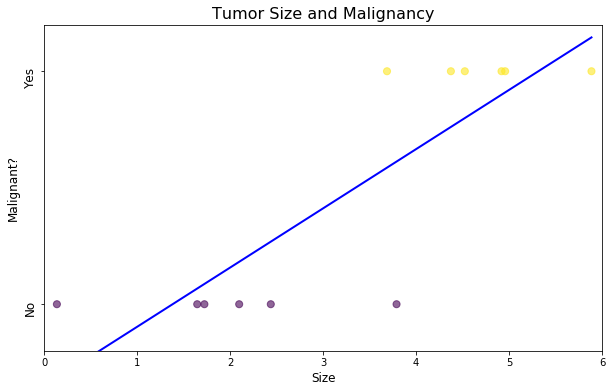

In [8]:
"""
Plot the fitted line.
"""
def linear_model_1Dplot(x, model, threshold=False, c="b"):
    ## set x range
    x = np.array(x)
    num = 10000
    x = np.linspace(start=min(x), stop=max(x), num=num).reshape(num, 1)
    ## plot regression line
    ## plot prediction if threshold is given
    if threshold:
        plt.plot(x, \
         [0 if i < threshold else 1 for i in model.predict(x)],
         lw=2, c=c)
        plt.plot(x, model.predict(x), lw=2, c=c, ls='--')
    else:
        plt.plot(x, model.predict(x), lw=2, c=c)
        
## Plot the data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm, y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot the linear model
linear_model_1Dplot(x_tm, lm_1)
## Set plot range
plt.axis([0,6, -.2, 1.2])
plt.show()

- We may then set a threshold:
  - Predict 1 if $\hat{y}\ge0.5$.
  - Predict 0 if $\hat{y}<0.5$.
- The predicted values become binary:

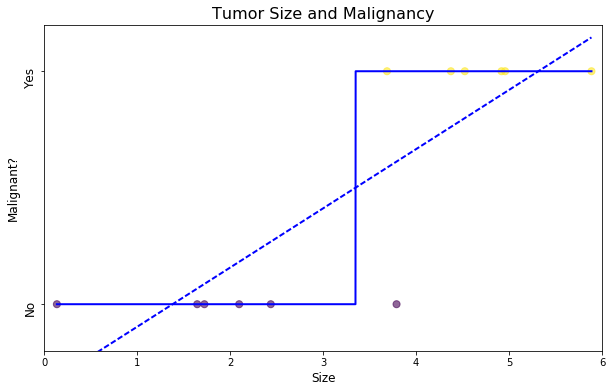

In [9]:
"""
Set prediction threshold.
"""
## Plot data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm, y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot the linear model with prediction line
linear_model_1Dplot(x_tm, lm_1, threshold=.5)
## Set plot range
plt.axis([0,6, -.2, 1.2])
plt.show()

**Issues with Linear Regression:**

- At first sight it looks like the result of the binary prediction with linear regression is not so bad. However, we do have the following two problems:

 - the continuous output exceeds the interval [0, 1]. Therefore we cannot interpret it as probability.
 - the prediction can be affected by outliers easily. 

We illustrate how the outliers - data points which are distant from the trend followed by the other observations - affect the model.

- We add two outliers to the original data set to form a new data set $x\_tm2$.

- Fit another linear regression model lm_2 (do not overwrite the previous one) with the simulated tumor data.

In [11]:
## Make a copy of the data set and et two outliers
x_tm2 = np.copy(x_tm)
x_tm2[-3, 0] = 13
x_tm2[-1, 0] = 14
## Fit a new linear model
lm_2 = linear_model.LinearRegression()
lm_2.fit(x_tm2, y_tm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- Visualize the two linear models, lm_1 and lm_2 on the same graph.

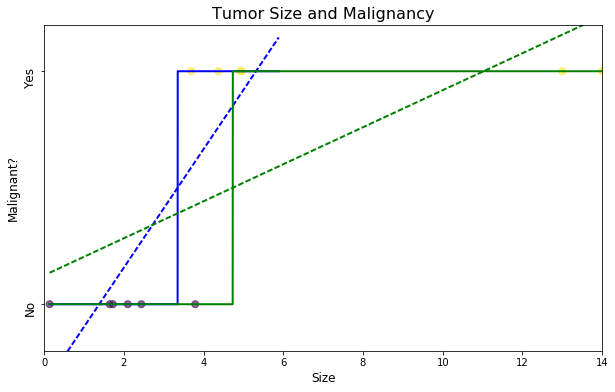

In [12]:
## Plot data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm2, y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot original linear model
linear_model_1Dplot(x_tm, lm_1, threshold=.5)
## Plot new linear model
linear_model_1Dplot(x_tm2, lm_2, threshold=.5, c='g')
## Set plot range
plt.axis([0,14,-.2,1.2])
plt.show()

<p><a name="logistic"></a></p>
## Logistic Regression

Logistic regression remedies the issues listed in the previous section by using the **Sigmoid function**.


**Sigmoid Function**

Sigmoid Function: a monotonically increasing smooth function which transforms an arbitrary real value to a value bounded between 0 and 1.

$$
S(t)=\frac{e^t}{1+e^t}=\frac{1}{1+e^{-t}}
$$

$e\approx2.71828$ is a mathematical constant [Euler’s number]

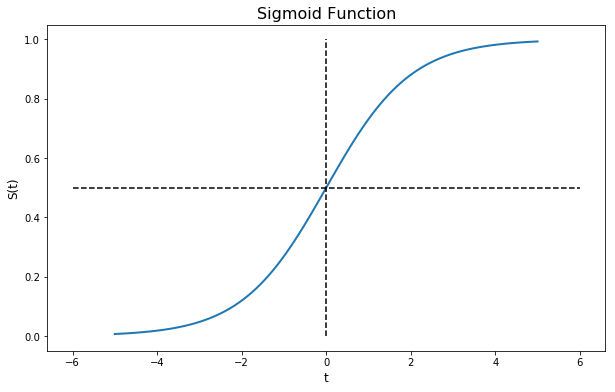

In [14]:
## Plot a sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(-5, 5, 100), 1 / ( 1 + np.exp(np.linspace(5, -5, 100))), lw=2)
## Plot a horizontal dashed line
plt.plot([-6, 6], [0.5, 0.5], ls='--', c='k')
## Plot a vertcal dashed line
plt.plot([0, 0], [0, 1], ls='--', c='k')
plt.xlabel('t', size=12)
plt.ylabel('S(t)', size=12)
plt.title('Sigmoid Function', size=16)
plt.show()

**Logistic Regression**

Logistic regression, despite its name, is a linear model for classification rather than regression.

- Idea: if we transform the values of the linear function $\beta_0+\beta_1X$ using the Sigmoid function $S(t)$, then no matter what values $\beta_0$, $\beta_1$ or $X$ take, the transformed $y$ will always have values between 0 and 1.

- *Logistic Regression* models use the following equation to estimate the probability that $y = 1$ given its size $X$:

$$
Pr(Y=1|X=x)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}
$$

- Let us use the likelihood function notation,  $p(x_i,\beta_0,\beta_1)=Pr(Y=1|X=x_i)$, 
to represent the probablity of those observed outcomes to be 1 conditioning on $X=x_i$.

Then, given an input X with n independent observations, the following likelihood gives the probability of having the prescribed labels:

$$L(\beta_0, \beta_1) = \prod_{i, y_i=1}p(x_i, \beta_0, \beta_1)\prod_{i, y_i=0}(1-p(x_i, \beta_0, \beta_1))$$


, where the first product is the probability of successfully predicting the “1”s and the second product is the probability of successfully predicting the “0”s in the data.

- The likelihood function $L(\beta_0, \beta_1)$ gives the probability of observing the prescribed classification outcome.

- Among all the possible $\beta_0$, $\beta_1$, it is natural to pick $\beta_0$ and $\beta_1$ maximizing the likelihood $L(\beta_0, \beta_1)$, i.e., to maximize the “agreement” of the selected model with the observed data.


In practice it is often more convenient to work with the logarithm of the likelihood function, called the **log-likelihood**:

$$
\begin{align}
\log{L(\beta_0,\beta_1)} &= \sum_{i=1}^{n}\{y_i\log{p(x_i,\beta_0,\beta_1)+(1-y_i)\log(1-p(x_i,\beta_0,\beta_1))}\}
\\
&= \sum_{i=1}^{n}\{y_i(\beta_0+\beta_1X)-\log(1+e^{\beta_0+\beta_1X})\}
\end{align}
$$

Logistic regression models are usually fitted by maximum (log) likelihood, i.e., to find $\beta_0$ and $\beta_1$ that maximize the function above. 

- Notice that the class labels $y_i$ pair with $\beta_0+\beta_1X$ naturally in the above expression, one thing we would notice in learning SVM, the support vector machine, later.

<p><a name="gradient"></a></p>
### Gradient Descent

To maximize the log-likelihood, most packages, including scikit-learn, use a numerical method called **gradient descent** (or its variant), i.e., to find the function maximum by search along a **steepest path** on the graph of log-likelihood function.


<img src="./pic/grad_desc.png" style="height: 450px; width: 600px;">

**Classification Based on Probability**

After estimating the parameters, the likelihood function $p(x,\beta_0,\beta_1)$ expresses the probability of output $Y=1$ given x. If we set a threshold on the probability, then we can predict binary output.

Let's use tumor size to determine malignancy:

  - If the maximum likelihood gives $Pr(Y=1|X=x) = 0.2$, then our prediction is $20\%$ chance of tumor being malignant, or equivalently, $80\%$ chance it's benign.
  - If we set the threshold, for example, to be 0.5, then we predict the tumor to be benign.


<p><a name="logistic-sklearn"></a></p>

## Logistic Regression in Scikit-Learn

In [1]:
### We first load the modules and data

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
path_to_file = "./data/pml2tumor.csv"
data = pd.read_csv(path_to_file)
x_tm = data[["Size"]]
y_tm = data["Malignant"]
x_tm2 = np.copy(x_tm)
x_tm2[-3, 0] = 13
x_tm2[-1, 0] = 14

- The implementation of logistic regression in scikit-learn can be accessed from class **`LogisticRegression`**.

In [4]:
from sklearn import linear_model
logit_1 = linear_model.LogisticRegression()

- Once a **`LogisticRegression`** object is created, the dictionary of the default parameters can be viewed with the `get_params()` method.

In [5]:
logit_1.get_params()
# 'penality': 'l2' refers to Ridge regression

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

The objective functions for logistic regression implemented in `sklearn` are:
<img src="./pic/L1.png">
and
<img src="./pic/L2.png">

where
- $w \text{ is the coefficients, which was denoted by } \beta_i \text{ in the class.}$
- $c \text{ is the intercept, which was denoted by } \beta_0 \text{ in the class. We can change the parameter } \\ \text{"fit_intercept" to keep or to remove it.}$
- $C \text{ is the inverse of regularization strength. This is opposite to the  } \alpha \text{ we had used in Ridge and Lasso,}\\ \text{smaller values specify stronger regularization.}$
- Therefore the first objective function is of $L_1$ penalty and the second is of $L_2$.

We will discuss **regularizations** in greater details. For this lecture we will set the parameter $C$ large, say 10000. In this way the model behaves as if there is **no** regularization, as what we stated in the theory part.

In [6]:
logit_1.set_params(C=1e4)
logit_1.fit(x_tm, y_tm)
print([logit_1.coef_, logit_1.intercept_])

[array([[4.50422378]]), array([-16.67929062])]


- We may evaluate the model with the method `score`. In a classification problem, the score defaults to the accuracy.

In [7]:
print(logit_1.score(x_tm, y_tm))

0.8333333333333334


- Prediction can be made with the `predict` method:

In [8]:
logit_1.predict([[3], [4]])  # the nested list will be converted to 2D np.array automatically

array([0, 1], dtype=int64)

- We can access the probability in each class predicted by the logistic regression as well:

In [9]:
logit_1.predict_proba([[3], [4]])

array([[0.9595586 , 0.0404414 ],
       [0.20790427, 0.79209573]])

With the function `logistic_model_1Dplot()` we visualize the probability estimated and the prediction made by the the logistic regression model.

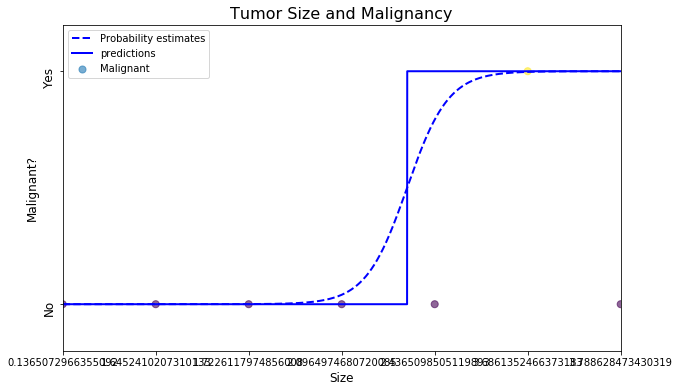

In [10]:
def data_1Dplot(x, y, xlabel=None, ylabel=None, labels=None, title=None):
    ## scatter plot the data
    plt.scatter(x, y, c=y, s=50, alpha=0.6)
    ## set labels
    if not xlabel is None:
        plt.xlabel(xlabel, size=12)
    if not ylabel is None:
        plt.ylabel(ylabel, size=12)
    ## set ticks for y
    y_ticks = np.unique(y)
    if not labels is None:
        plt.yticks(y_ticks, labels, \
                   rotation='vertical', size=12)
    ## set title
    if not title is None:
        plt.title(title, size=16)
        
def logistic_model_1Dplot(x, model, c="b"):
    x = np.array(x)
    num = 10000
    x = np.linspace(min(x), max(x), num=num).reshape(num,1)
    ## only plot the probability of prediction to be 1
    plt.plot(x, model.predict_proba(x)[:,1],
             ls='--', lw=2, c=c, label="Probability estimates")
    plt.plot(x, model.predict(x), lw=2, c=c, label="predictions")
    

## Plot the data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm, y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot logistic model with original dataset
logistic_model_1Dplot(x_tm, logit_1)
## Set plot range
plt.axis([0,6,-0.2,1.2])
## Legend top-left corner
plt.legend(loc=2)
plt.show()

- Below we see that the boundary is not affected that much by outliers with logistic regression.

In [11]:
logit_2 = linear_model.LogisticRegression()
logit_2.set_params(C=1e4)
logit_2.fit(x_tm2, y_tm)
print([logit_2.coef_, logit_2.intercept_])

[array([[4.1266289]]), array([-15.28821709])]


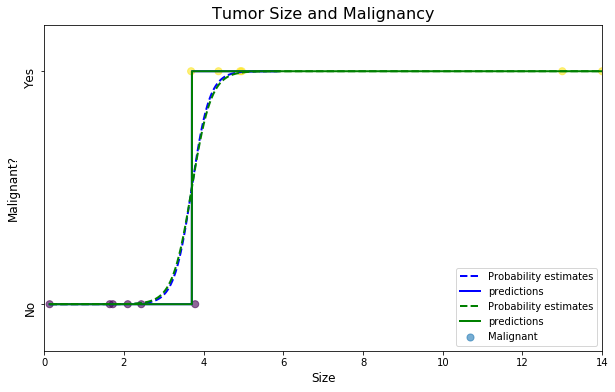

In [12]:
## Plot the data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm2, y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot logistic model with original dataset
logistic_model_1Dplot(x_tm, logit_1)

## Plot logistic model with outlier
logistic_model_1Dplot(x_tm2, logit_2, c='g')   # set the color to green
## Set plot range
plt.axis([0,14,-.2,1.2])
## Legend bottom-right corner
plt.legend(loc=4)
plt.show()

<p><a name="logistic-multi"></a></p>
### Logistic Regression with Multiple Variables

When mulitple input variables are involved, we just need to include them in the linear function as we did in multiple linear regression

The matrix form can be written as:

$$Pr(Y=1|\mathbf{X})=\frac{e^{\mathbf{X}\beta}}{1+e^{\mathbf{X}\beta}}$$

<p><a name="ex1"></a></p>
#### Exercise 1

You have historical data from the previous student applicants. For each record, you have the applicant’s two exam scores and the admissions decision. Your task is to build a logistic model that estimates an applicant’s probability of admission based on those two exam scores.

- The code below helps to load the data:

In [14]:
path_to_file = "./data/pml2admission.csv"
data = pd.read_csv(path_to_file)
data.head()

,Decision,Test_1,Test_2
0,1,81.0,85.0
1,0,71.0,85.0
2,1,80.0,90.0
3,0,79.0,84.0
4,0,72.0,94.0


- We then visualize the data set.

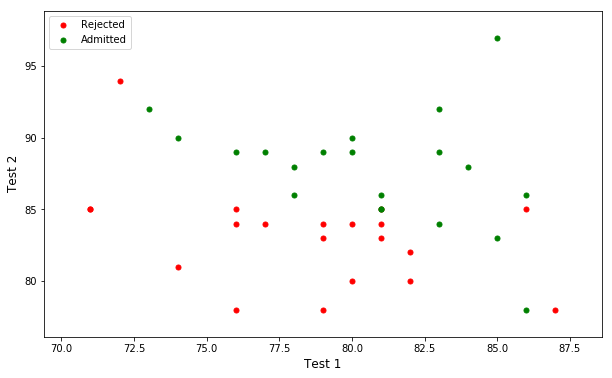

In [15]:
def data_2Dplot(x, y, legends=None, xlabel=None, ylabel=None):
    x, y = np.array(x), np.array(y)
    if legends is None:
        legends = np.unique(y)
    col = ["r", "g", "b", "m", "c", "k"]
    ## plot the data points
    for i in np.unique(y):
        plt.scatter(x[y==i,0], x[y==i,1], c=col[i%6], s=25, label=legends[i])
    
    if xlabel:
        plt.xlabel(xlabel,size=12)
    if ylabel:
        plt.ylabel(ylabel,size=12)
    plt.legend(loc=2)
    del_0, del_1 = (max(x[:,0]) - min(x[:,0]))*.1, (max(x[:,1]) - min(x[:,1]))*.1
    plt.axis([
        min(x[:,0]) - del_0, max(x[:,0]) + del_0,
        min(x[:,1]) - del_1, max(x[:,1]) + del_1]
    )

def logistic_model_2Dplot(x, model):
    # import warnings
    # warnings.warn('Does not work for all problems. (Works only for binary label?)')
    
    def plot_y(x_1, model=model):
        ## np.column_stack() combines intercept with coefficents
        for coef in np.column_stack((model.intercept_, model.coef_)):
            ## take b0, b1, b2 for one boundary at a time 
            b_0, b_1, b_2 = coef[:3]
            # given 1, calculate corresponding x2
            # http://python-future.org/compatible_idioms.html
            # Idiomatic Py3, but inefficient on Py2
            yield list(map(lambda x: -(b_0 + b_1*x) / b_2, x_1))
    
    x = np.array(x)
    x_a = [min(x[:,0]), max(x[:,0])]
    col = ["r", "g", "b", "m", "c", "k"]
    for i, x_b in enumerate(plot_y(x_a, model)):
        plt.plot(x_a, x_b, c=col[i])

def plot_model(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should be numpy arrays
    label: true label
    '''
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    colDict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', colDict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters and true labels
    plt.scatter(x, y, c=label)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

## Data
scores = data[["Test_1", "Test_2"]]
decision = data["Decision"]
## Plotting
plt.figure(figsize=(10, 6))
data_2Dplot(scores, decision, \
              legends=["Rejected", "Admitted"], \
              xlabel="Test 1", ylabel="Test 2")
plt.show()

Build a logistic regression model **`logit`** with the data.
- What's the score?

In [16]:
## Import linear_model from sklearn if you haven't
## Initialize a LogisticRegression instance with C=10e4
decision_logit = linear_model.LogisticRegression(C=1e4)

#### Your code here
decision_logit.fit(scores, decision)

print(decision_logit.score(scores, decision))


0.875


- If you build the model correctly, the code below should sketch the decision boundary for you:

In [17]:
print(decision_logit.intercept_)
print(decision_logit.coef_)

[-81.40161884]
[[0.41017514 0.57132359]]


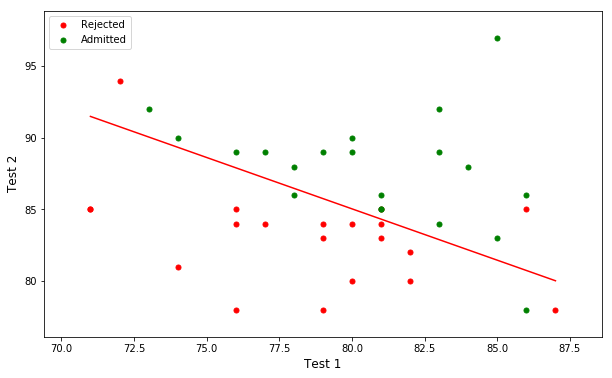

In [18]:
# Plot data points
plt.figure(figsize=(10, 6))
data_2Dplot(scores, decision, \
            legends=["Rejected", "Admitted"], \
            xlabel="Test 1", ylabel="Test 2")

# Plot decision boundary
logistic_model_2Dplot(scores, decision_logit)

plt.show()

C:\Users\mlu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


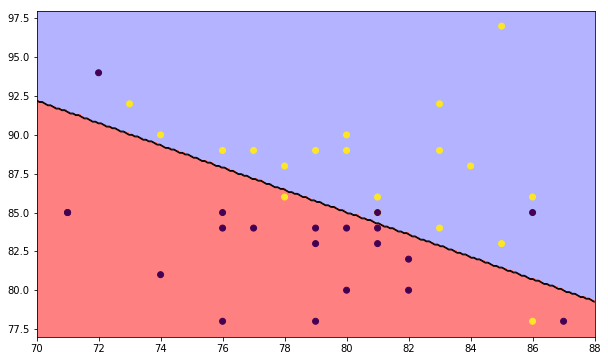

In [19]:
# Alternative visualization
# Plot data points and decision boundary
plt.figure(figsize=(10, 6))
plot_model(
    decision_logit,
    scores.loc[:, 'Test_1'].values.reshape(-1, 1),
    scores.loc[:, 'Test_2'].values.reshape(-1, 1),
    label=decision.values.reshape(-1, 1)
)
plt.show()

<p><a name="classes"></a></p>
### Logistic Regression with More than Two Classes

When the output contains more than two classes, scikit-learn uses a so called “one-vs-rest” setting, i.e., separate binary classifiers are trained for all classes.

We are going to classify the species of the iris flowers according to their numeric features. Since there are three different species, the logistic model will build three classifiers:
- setosa v.s. versicolor & virginica
- versicolor v.s. setosa & virginica
- virginica v.s. setosa & versicolor

We will use only the 3rd and the 4th features (the petal length and the petal width)

In [20]:
from sklearn import datasets
iris = datasets.load_iris()
pair = (2, 3)

xlabel = iris.feature_names[pair[0]]
ylabel = iris.feature_names[pair[1]]

iris_x = iris.data[:,pair]
iris_y = iris.target

<p><a name="ex2"></a></p>
#### Exercise 2

- Again we first create and fit the logistic regression:

In [33]:
iris_logit = linear_model.LogisticRegression(C=1e4)
#### Your code here
iris_logit.fit(iris_x, iris_y)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

- Find out the score:

In [34]:
#### Your code here
print(iris_logit.score(iris_x, iris_y))

0.96


- Find out the coefficients:

In [35]:
#### Your code here
print(iris_logit.coef_)

[[-6.05056204 -8.85923128]
 [ 1.5462408  -3.10649957]
 [ 5.62794434 10.30489167]]


Again, if you build the model correctly, the code below should give you the decision boundary. Can you tell which boudary line is predicted by which model?

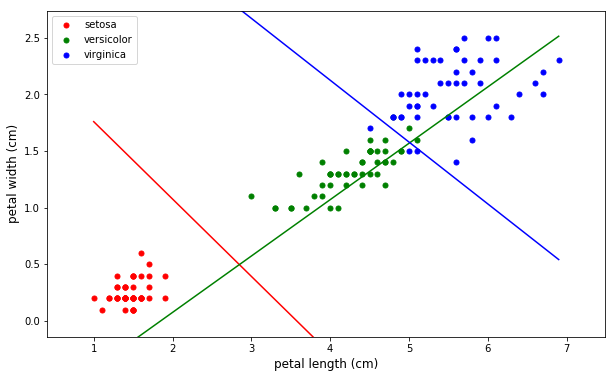

In [36]:
## Plot the data points and the logistic regression classifiers
plt.figure(figsize=(10, 6))
data_2Dplot(iris_x, iris_y, xlabel=xlabel, ylabel=ylabel, legends=iris.target_names)
logistic_model_2Dplot(iris_x, iris_logit)
plt.show()

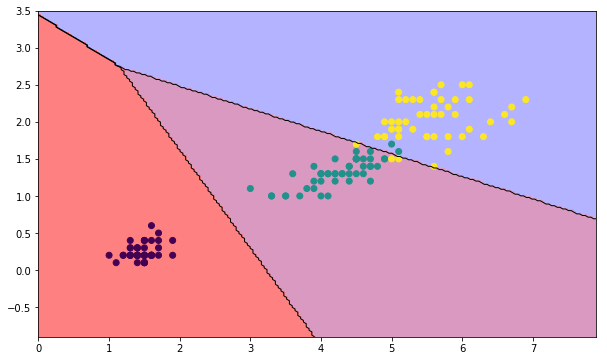

In [37]:
plt.figure(figsize=(10, 6))
plot_model(iris_logit, iris_x[:, 0], iris_x[:, 1], label=iris_y)
plt.show()

<p><a name="discriminant"></a></p>
## Discriminant Analysis

**As a preparation, let us load some python modules and define some helper funtions**

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


def multivariate_normal(mu, sigma, width = 3):
    ## generate data for 3D surface plot
    X = np.linspace(mu[0] - width*sigma[0, 0], mu[0] + width*sigma[0, 0], 300)
    Y = np.linspace(mu[1] - width*sigma[1, 1], mu[1] + width*sigma[1, 1], 300)
    X, Y = np.meshgrid(X, Y)
    s_inv = sigma.I
    Z = np.exp(-(s_inv[0,0]*(X-mu[0])**2 + s_inv[1,1]*(Y-mu[1])**2 + \
                (s_inv[0,1]+s_inv[1,0])*(X-mu[0])*(Y-mu[1]))/2)
    return X, Y, Z/(2*np.pi)/(np.linalg.det(sigma))**.5

def multivariate_normal_plot(mu, sigma, n, step, color, width=3, alpha=0.3, cmap=cm.copper, label=None):
    ## plot
    X, Y, Z = multivariate_normal(mu, sigma, width=width)
    ax.plot_surface(X, Y, Z, rstride=6, cstride=6, alpha=alpha, color=color, linewidth=0.5, label=label)
    cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap=cmap, levels=np.arange(n)*step)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
def show_sample():
    np.random.seed(1)
    class_1 = stats.multivariate_normal(np.zeros([2]), np.eye(2)).rvs(50)
    class_2 = stats.multivariate_normal(np.ones([2])*3, np.array([[1, 0.5],[0.5, 1]])).rvs(53)
    fig = plt.figure(figsize=(10, 6))
    plt.scatter(class_1[:, 0], class_1[:, 1], alpha=0.7, label='class blue')
    plt.scatter(class_2[:, 0], class_2[:, 1], color='green', alpha=0.7, label='class green')
    plt.legend(loc=2)

**The Concept of Conditional Probability**

Let $Y$ be an event with probability $P(Y) > 0$, the conditional probability of observing $X$ given that $Y$ has occurred is defined as:

$$
P(X|Y) = \frac{P(X,Y)}{P(Y)}
$$

- $P(X,Y)$ refers to the joint probability of observing both the event $X$ and event $Y$. 
- $P(X|Y)$ is the probability of event $X$ after insuring event $Y$'s occurrence.

**Example**: Suppose that we are given a random number uniformly distributed across 0 to 1. How do we compute the probability of the number falling into the blue region (plotted in the output of the next code block)?

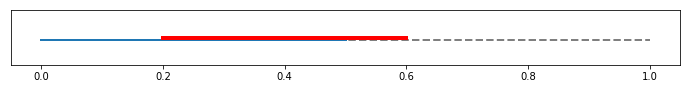

In [39]:
fig = plt.figure(figsize=(12, 1))
plt.plot([0, 1],[-0.01, -0.01], color='k', ls='--', linewidth=2, alpha=0.5)
plt.plot([0, 0.5],[-0.01, -0.01], linewidth=2, alpha=1)
plt.plot([0.2, 0.6],[0, 0], color='red', linewidth=4)
plt.ylim(-0.1, 0.1)
plt.xticks()
plt.yticks([])
plt.show()

If $X$ and $Y$ are independent, $P(X, Y) = P(X)P(Y)$:

- Then the conditional probability is nothing but

$$P(X|Y) = \frac{P(X, Y)}{P(Y)} = \frac{P(X)P(Y)}{P(Y)}  = P(X)$$ 

- This implies the occurrence of $Y$ does not have any impact on the probability of the occurrence of $X$


**Conditional Probability Example**

Consider an experiment of picking balls of two colors, red and black, from two boxes labeled A and B.

- There are 10 black balls and 1 red ball in box A, and 1 black ball and 10 red balls in box B.
- We randomly choose a box (with equal chance) and then pick a ball from the chosen box.
- What is the probability that we draw a red ball?

<img src='./pic/balls_in_box.png'>

While choosing a box, we have:
- $P(A)=P(B)=0.5$.
- If we choose A, $P(red|A) = 1/11$. 
- if we choose B, $P(red|B) = 10/11$.

So the total probability to draw one red ball is:
$$
\begin{align}
P(red) &= P(red|A)\cdot P(A)+P(red|B)\cdot P(B)
\\
&= \frac{1}{11} \times 0.5 + \frac{10}{11} \times 0.5 
\\
&= \frac{1}{2}
\end{align}
$$

The 0.5 probability can be computed by ignoring the boxes and lump the balls together.

- There are 1+10 red balls and 10+1 blacks balls. So the chance to get a red ball is 11.0/22.0 = 0.5

- This works because the prior probabilities of choosing box A and B are the same

<p><a name="bayes"></a></p>
### Bayes Theorem

Bayes theorem is named after [Thomas Bayes](https://en.wikipedia.org/wiki/Thomas_Bayes).

It describes the probability of an event, based on some prior condition that might be related to the event. 

For simplicity we assume that the event $Y$ has a finite number of outcomes, parametrized by $l$.

Then Bayes theorem is stated mathematically as the following equation:

$$
\begin{align}
P(Y|X) &= \frac{P(X|Y)\cdot P(Y)}{P(X)}
\\
&= \frac{P(X|Y)\cdot P(Y)}{\sum_{l}P(X|Y=l)\cdot P(Y=l)}
\end{align}
$$

How does this relate to our classification problem?

Consider from the ball-picking example we realize that for a red ball,

- the probability that it's from Box A is $\frac{1}{11}$.
- the probability that it's from Box B is $\frac{10}{11}$.

Next time if we get a red ball, shouldn't we be more confident that the ball has been from box B?

<p><a name="theory"></a></p>
### Discriminant Analysis: Basic Theory

When we label the data set according to the classification outcome, we may hypothesize that each sub-data set is generated 
from certain type of probability distributions. 
Discriminant analysis is a statistical technique which classifies by determining the probability distributions of all classes based on the data.

- The type of probability distribution is hypothesized. But the specific distribution is pinned down by data fitting

**Motivation**

To be more precise, let's consider a simulated example, performing binary classification based on a numerical feature.

In [40]:
#### Creating the Data

end = 30
len_0 = 70
len_1 = 70
color_0 = 'r'
color_1 = 'g'

np.random.seed(108)
x_0 = stats.gamma(9, 0.5).rvs(len_0)
x_1 = stats.norm(15, 6).rvs(len_1)
y   = np.array([color_0]*len_0 + [color_1]*len_1)  #  first len_0 of class r, the next len_1 of class g

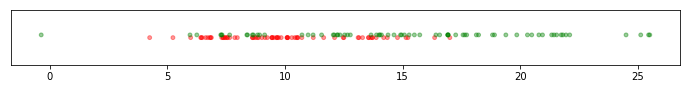

In [41]:
#### Visualize the Data

plt.figure(figsize=(12, 1))
plt.ylim(-0.1, .1)
plt.yticks([])
scatter_kwargs = dict(color=y, s=15, alpha=0.4)
plt.scatter(x=np.concatenate([x_0, x_1]), y=[0]*len_0 + [0.01]*len_1, **scatter_kwargs)
plt.show()

If we found a new observation, which class do you think it belongs to?

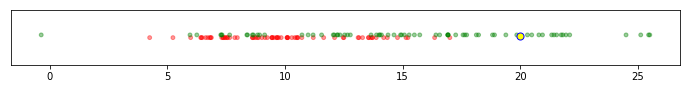

In [74]:
plt.figure(figsize=(12, 1))
plt.ylim(-0.1, .1)
plt.yticks([])
plt.scatter(x=np.concatenate([x_0, x_1]), y=[0]*len_0 + [0.01]*len_1, **scatter_kwargs)
plt.scatter(20, 0.005, c='yellow', s=50, edgecolors='b')
plt.show()

What about the next one?

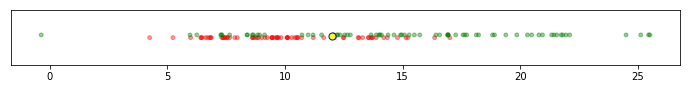

In [75]:
plt.figure(figsize=(12, 1))
plt.ylim(-0.1, .1)
plt.yticks([])
plt.scatter(np.concatenate([x_0, x_1]), [0]*len_0 + [0.01]*len_1, **scatter_kwargs)
plt.scatter(12, 0.005, c='yellow', s=50, edgecolors='b')
plt.show()

What makes us feel differently?

- If there is some other information tacitly guided us to the conclusion, can we somehow name it? Or visualize it?

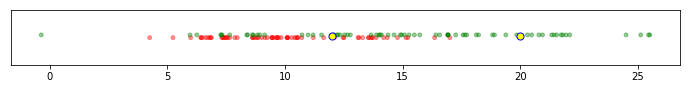

In [76]:
plt.figure(figsize=(12, 1))
plt.ylim(-0.1, .1)
plt.yticks([])
plt.scatter(np.concatenate([x_0, x_1]), [0]*len_0 + [0.01]*len_1, **scatter_kwargs)
yellow_kwargs = dict(c='yellow', s=50, edgecolors='b')
plt.scatter(20, 0.005, **yellow_kwargs)
plt.scatter(12, 0.005, **yellow_kwargs)
plt.show()

How about **density plot** for each class?  The data is generated from two known probability distributions. So we can
make the exact density plots.

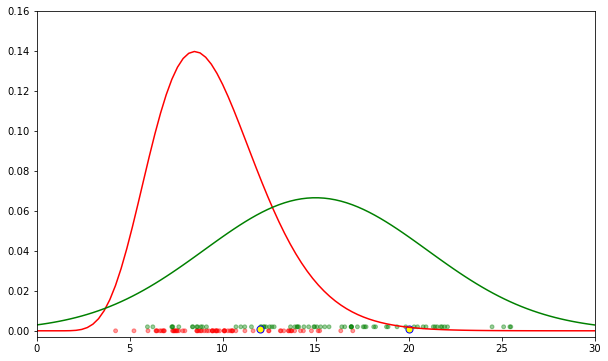

In [77]:
pdf_0 = stats.gamma(9, 0.5).pdf
pdf_1 = stats.norm(15, 6).pdf

lin_sp = np.linspace(start=0, stop=end, num=100)
plt.figure(figsize=(10, 6))
plt.plot(lin_sp, pdf_0(lin_sp), color=color_0)
plt.plot(lin_sp, pdf_1(lin_sp), color=color_1)
plt.scatter(np.concatenate([x_0, x_1]), [0]*len_0 + [0.002]*len_1, **scatter_kwargs)
plt.ylim(-0.003, 0.16)
plt.xlim(0, 30)
yellow_kwargs = dict(c='yellow', s=50, edgecolors='b')
plt.scatter(20, 0.001, **yellow_kwargs)
plt.scatter(12, 0.001, **yellow_kwargs)
plt.show()

What's the difference between the two observations?

- when x = 20, the red and green classes have dramatically different probability densities; but for x = 12, it is not the case!

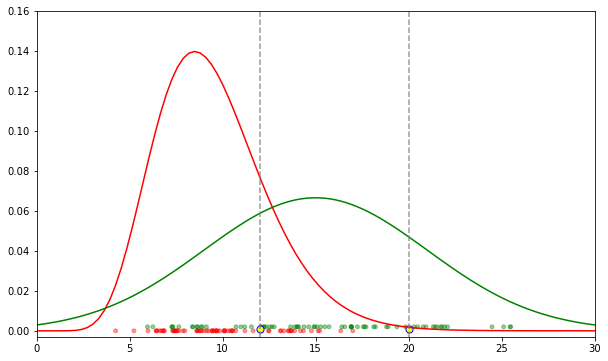

In [79]:
lin_sp = np.linspace(start=0, stop=end, num=100)
plt.figure(figsize=(10, 6))
plt.plot(lin_sp, pdf_0(lin_sp), color=color_0)
plt.plot(lin_sp, pdf_1(lin_sp), color=color_1)
plt.scatter(np.concatenate([x_0, x_1]), [0]*len_0 + [0.002]*len_1, **scatter_kwargs)
plt.ylim(-0.003, 0.16)
plt.xlim(0, 30)
yellow_kwargs = dict(c='yellow', s=50, edgecolors='b')
plt.scatter(20, 0.001, **yellow_kwargs)
plt.scatter(12, 0.001, **yellow_kwargs)
line_kwargs = dict(ls='--', color= 'grey', alpha=0.8)
plt.axvline(x=20, **line_kwargs)
plt.axvline(x=12, **line_kwargs)
plt.show()

Note that to perform classification, we need to compute

$$
\text{ }\\
P(Y=k \ | \ X =x ) \text{ for each class k}
$$

But we just found that

$$
\text{ }\\
p(X=x \ | \ Y=k) \text{ for each class k}
$$

is helpful! 

**How do we relate the two kinds of conditional probability?**

**Discriminant Analysis and Bayes Theorem**

Bayes theorem comes into play because we want to relate the two conditional probabilities above.

$$
P(Y=k \ | \ X=x) = \frac{p(X=x \ | \ Y=k) P(Y=k)}{\sum_{l}p(X=x \ | \ Y=l) P(Y=l)}
$$

**Questions**:

- How do we estimate $P(Y = k) \text{ (this is called the } \textbf{prior probability } \text{for class k)} \text{ ?}$
- How do we estimate $p(X=x \ | \ Y=k)\text{ ?}$

**Answers**

- The natural candidate for estimating $P(Y=k) \text{ is simply } \frac{n_k}{n}$, the fraction of observations, where
 - $n_k$ is the number of observations in class k.
 - $n$ is the total number of the observations.
- Modeling $p(X=x \ | \ Y=k)$ is nontrivial! Different models (hypotheses on the probability distributions) result in different types of classifiers as we will see.

<p><a name="bayes_classifier"></a></p>
### Bayes Classifier

Once we can predict the probability of an observation belonging to any class, we can then classify the observation to the class with the highest estimated probability.

- This is known as **Bayes classifier**. It minimises the probability of misclassification.
- The boundary of classification (decision boundary) is simply the location where the probabilities of different classes become the same.

**Caution**

Let us ignore temporally the fact that the class prior probabilities can be different. Thus
the plot below is not necessarily the right way to find the decision boundary

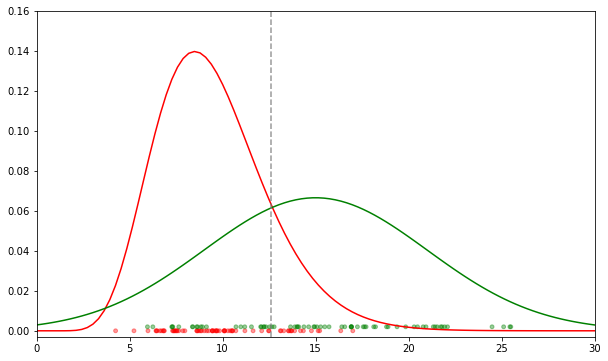

In [83]:
lin_sp = np.linspace(start=0, stop=end, num=100)
plt.figure(figsize=(10, 6))
plt.plot(lin_sp, pdf_0(lin_sp), color=color_0)
plt.plot(lin_sp, pdf_1(lin_sp), color=color_1)
plt.scatter(np.concatenate([x_0, x_1]), [0]*len_0 + [0.002]*len_1, **scatter_kwargs)
plt.ylim(-0.003, 0.16)
plt.xlim(0, 30)
plt.axvline(x=12.6, ls='--', color= 'grey', alpha=0.8)
plt.show()

**Observation** The prior probabilities play an important role in discriminant analysis, but we did **NOT** consider them in our primitive approach above.

- To emphasize the effect of the density within each class, we intentionally created two classes with the same size. When the sizes are different, missing the prior probability would cause a big trouble.

Below is an extreme case:

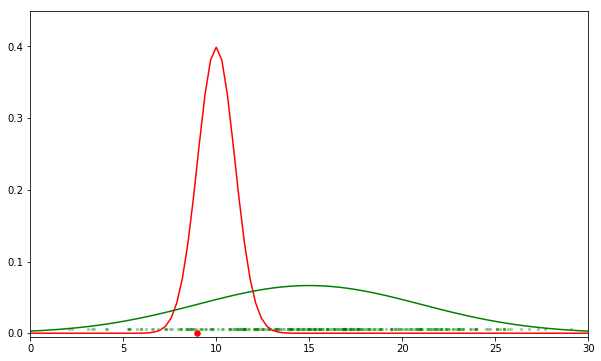

In [84]:
np.random.seed(108)
x__0 = stats.norm(10, 1).rvs(1)
x__1 = stats.norm(15, 6).rvs(300)
pdf__0 = stats.norm(10, 1).pdf
pdf__1 = stats.norm(15, 6).pdf

plt.figure(figsize=(10, 6))
lin_sp = np.linspace(start=0, stop=end, num=100)
plt.plot(lin_sp, pdf__0(lin_sp), color=color_0)
plt.plot(lin_sp, pdf__1(lin_sp), color=color_1)

plt.scatter(x__1, 0.006*np.ones(300), color='green', s=5, alpha=0.3)
plt.scatter(x__0, 0, color='red', s = 30)

plt.ylim(-0.005, 0.45)
plt.xlim(0, 30)
plt.show()

<p><a name="models"></a></p>
## Discriminant Analysis: Modeling

To build a Bayes classifier, the only thing we miss is the probability distribution of each class

$$
p(X=x \ | \ Y=k)
$$

Since this is a continuous distribution, the **Gaussian** distribution is widely used to model it. Different assumptions on Gaussian distribution result in different kind of classifiers. The following three are most common:

- Linear Discriminant Analysis (LDA)
- Quadratic Discriminant Analysis (QDA)
- Gaussian Naive Bayes (This is the same as QDA in a one dimensional case)

<p><a name="oneD"></a></p>
### The One Dimensional Case

When we have only one feature, we use one dimensional Gaussian distribution with a pdf 

$$
N(\mu, \sigma)(x) = \frac{1}{\sqrt{2\pi}\sigma}exp\big[{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}\big]
$$

- Notice that it is sufficient to specify the **mean** and the **standard deviation** to specify a Gaussian distribution. 

In general we allow **different means** among different classes, but we assume identical standard deviation among different LDA classes:

**LDA**

For LDA, we assume that the standard deviation is the same for each class. In one dimensional case, this means that the distribution for each class $k \text{ is}$
$$
p(X=x \ | \ Y=k) = \frac{1}{\sqrt{2\pi}\sigma}exp\big[{-\frac{1}{2}\big(\frac{x-\mu_k}{\sigma}\big)^2}\big]
$$

With visualization, this means that the **width** of the distribution for each class remains the same.

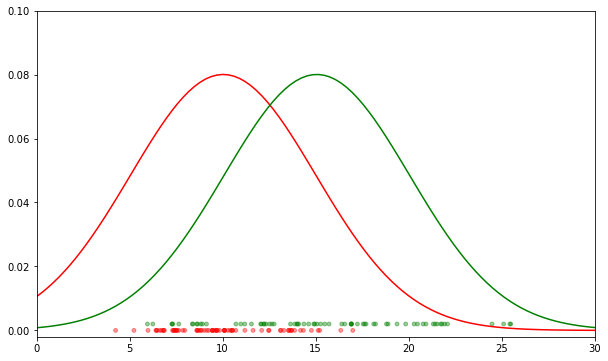

In [86]:
mu_0 = np.mean(x_0)
mu_1 = np.mean(x_1)
std = np.std( np.concatenate([x_0, x_1]) )

plt.figure(figsize=(10, 6))
plt.scatter(np.concatenate([x_0, x_1]), [0]*len_0 + [0.002]*len_1, **scatter_kwargs)

point = np.linspace(start=0, stop=30, num=100)
plt.plot(point, stats.norm(mu_0, std).pdf(point), color='red')
plt.plot(point, stats.norm(mu_1, std).pdf(point), color='green')


plt.xlim(0,30)
plt.ylim(-0.002, 0.1)
plt.show()

**Question** 

- Now we know that with LDA the probability distribution for each class $k \text{ is}$
$$
p(X=x \ | \ Y=k) = \frac{1}{\sqrt{2\pi}\sigma}exp\big[{-\frac{1}{2}\big(\frac{x-\mu_k}{\sigma}\big)^2}\big]
$$
How do we decide $\mu_k \text{ and the class label independent } \sigma \text{ ?}$

**Answer**

$$
\begin{align}
\hat{\mu}_k &= \frac{1}{n_k}\sum_{i;y_i=k}x_i
\\
\hat{\sigma}^2 &= \frac{1}{n-K}\sum_{k=1}^{K}\sum_{i;y_i=k}(x_i-\hat{\mu}_k)^2
\\
&=\sum_{k=1}^{K}\frac{n_k-1}{n-K}\cdot\hat{\sigma}_k^2
\end{align}
$$

where
  - $\hat{\mu}_k$ is the sample mean of class $k$
  - $K$ is the total number of classes
  - $\hat{\sigma}_k^2=\frac{1}{n_k-1}\sum_{i;y_i=k}(x_i-\hat{\mu}_k)^2$ is the sample variance of class $k$
  - for $c_k = \frac{n_k-1}{n-K}$, we have $\sum_{k=1}^K c_k = \sum_{k=1}^K \frac{n_k-1}{n-K} = 1$
  - So the formula on $\hat{\sigma}$ is the weighted average of the various $\hat{\sigma}_k$

**QDA**

For QDA, the standard deviations are allowed to vary among the classes. In one dimensional case, this means the **width** of the distribution for each class can be different. Therefore:

$$
p(X=x \ | \ Y=k) = \frac{1}{\sqrt{2\pi}\sigma_k}exp\big[{-\frac{1}{2}\big(\frac{x-\mu_k}{\sigma_k}\big)^2}\big]
$$

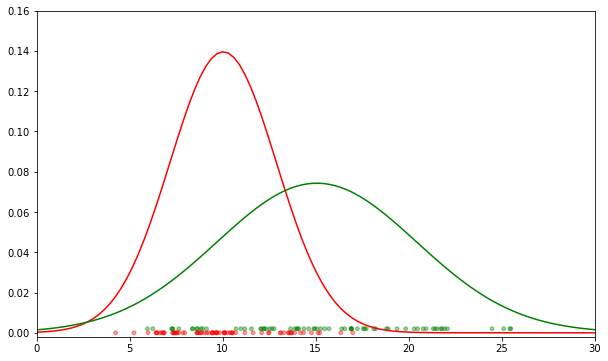

In [89]:
mu_0 = np.mean(x_0)
mu_1 = np.mean(x_1)
std_0 = np.std(x_0)
std_1 = np.std(x_1)

plt.figure(figsize=(10, 6))
plt.scatter(np.concatenate([x_0, x_1]), [0]*len_0 + [0.002]*len_1, **scatter_kwargs)

point = np.linspace(0, 30, 100)
plt.plot(point, stats.norm(mu_0, std_0).pdf(point), color='red')
plt.plot(point, stats.norm(mu_1, std_1).pdf(point), color='green')


plt.xlim(0,30)
plt.ylim(-0.002, 0.16)
plt.show()

**Question** 

- Now we know that with QDA the distribution for each class $k \text{ is}$
$$
p(X=x \ | \ Y=k) = \frac{1}{\sqrt{2\pi}\sigma_k}exp\big[{-\frac{1}{2}\big(\frac{x-\mu_k}{\sigma_k}\big)^2}\big]
$$
How do we estimate $\hat{\mu}_k$ and $\hat{\sigma}_k$?

<p><a name="highD"></a></p>
### Higher Dimensional Cases

We start with the discussion on higher dimensional Gaussian distribution. This is essentially the only difference in higher dimensional discriminant analysis.

<p><a name="highG"></a></p>
#### Higher Dimensional Gaussian Distribution

We still need only "two" parameters to specify higher dimensional Gaussian distribution: the **mean** and the **covariance**. However, for a p dimensional case (with p features),
- the mean is a p-dimensional vector
- the covariance is a $p \times p$ symmetric matrix

The probability density function becomes:
$$
N(\mu, \Sigma)(x) = \frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}}exp\big[{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}\big]
$$


**Mean**

The mean still decides where the "bell" is centered at.

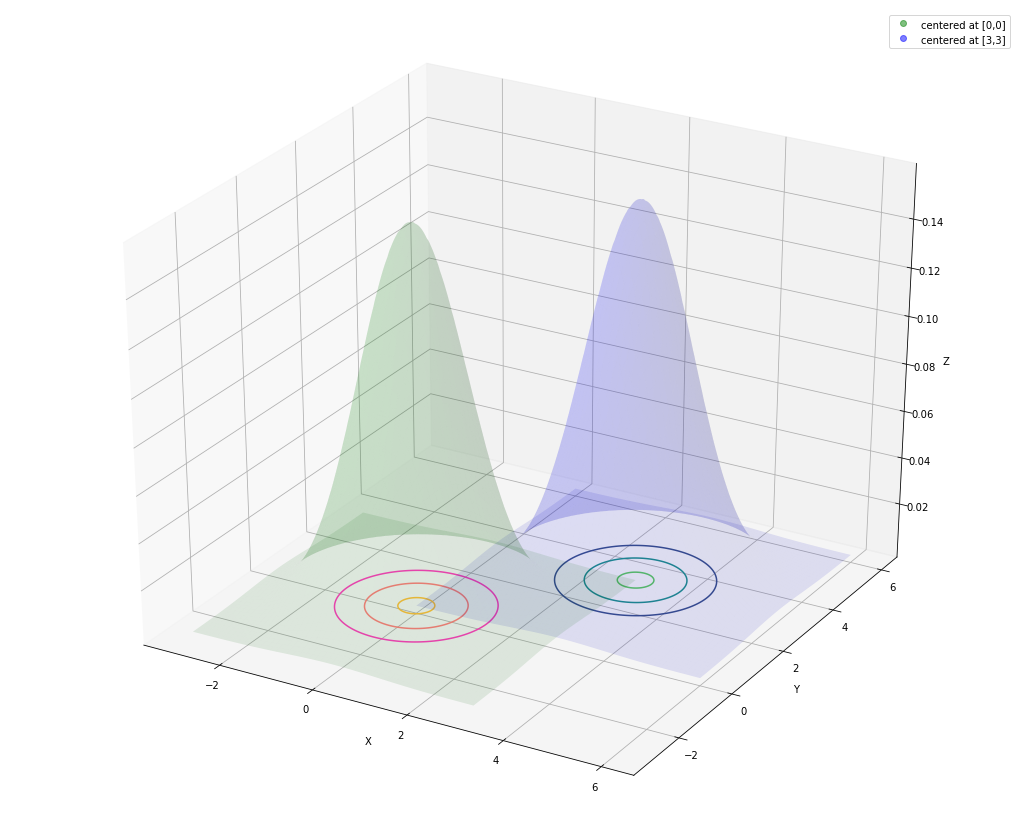

In [103]:
mu_1 = np.array([0,0])
mu_2 = np.array([3,3])
sigma = np.matrix([[1, 0], [0, 1]])

fig = plt.figure(figsize=(18, 15))
ax = fig.gca(projection='3d')
multivariate_normal_plot(mu_1, sigma, n=5, step=0.05, color='green', alpha=0.1, cmap=cm.spring)
multivariate_normal_plot(mu_2, sigma, n=5, step=0.05, color='blue', alpha=0.1, cmap=cm.viridis)

# Legend
legend_kwargs = dict(linestyle='none', alpha=0.5, marker='o')
fake2Dline1 = mpl.lines.Line2D([0], [0], c='green', **legend_kwargs)
fake2Dline2 = mpl.lines.Line2D([0], [0], c='blue', **legend_kwargs)
ax.legend([fake2Dline1, fake2Dline2], ['centered at [0,0]', 'centered at [3,3]'], numpoints=1)

plt.show()

**Covariance Matrix**

The covariance matrix is a $p \times p \text{ matrix.}$ The covariance matrix, one of whose special cases is the square of standard deviation in one dimensional space, decides the **shape** of the "bell". However, the shape means more than just the width in a higher dimensional space.

**Width**

Let's compare two Gaussian distributions with different covariance matrices in a two dimensional space.

$
\Sigma_1 = 
\begin{bmatrix}
1 & 0 
\\[0.3em]
0 & 1
\end{bmatrix}
\text{ and } \ 
\Sigma_2 = 
\begin{bmatrix}
2 & 0 
\\[0.3em]
0 & 2
\end{bmatrix}
$

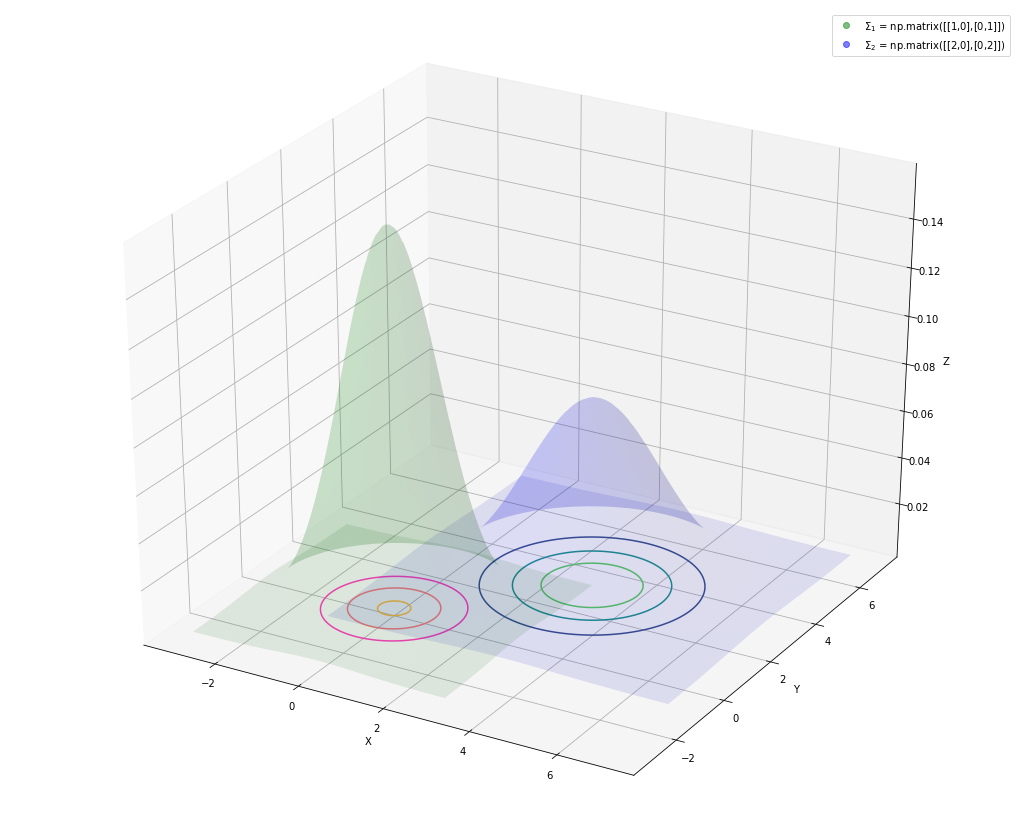

In [104]:
mu_1 = np.array([0,0])
mu_2 = np.array([3,3])
sigma_1 = np.matrix([[1, 0], [0, 1]])
sigma_2 = np.matrix([[2, 0], [0, 2]])

fig = plt.figure(figsize=(18, 15))
ax = fig.gca(projection='3d')
multivariate_normal_plot(mu_1, sigma_1, n=5, step=0.05, color='green', alpha=0.1, cmap=cm.spring)
multivariate_normal_plot(mu_2, sigma_2, n=5, step=0.02, width= 2, color='blue', alpha=0.1, cmap=cm.viridis)

# Legend
legend_kwargs = dict(linestyle='none', alpha=0.5, marker='o')
fake2Dline1 = mpl.lines.Line2D([0], [0], c='green', **legend_kwargs)
fake2Dline2 = mpl.lines.Line2D([0], [0], c='blue', **legend_kwargs)
label = ['$\Sigma_1$ = np.matrix([[1,0],[0,1]])', '$\Sigma_2$ = np.matrix([[2,0],[0,2]])']
ax.legend([fake2Dline1, fake2Dline2], label, numpoints=1)

plt.show()

**Correlation**

Each off-diagonal entry in the covariance matrix is proportional to the correlation between a pair of features. Let's compare the two cases below:

$
\Sigma_1 = 
\begin{bmatrix}
1 & 0 
\\[0.3em]
0 & 1
\end{bmatrix}
\text{ and } \ 
\Sigma_2 = 
\begin{bmatrix}
1 & 0.5 
\\[0.3em]
0.5 & 1
\end{bmatrix}
$

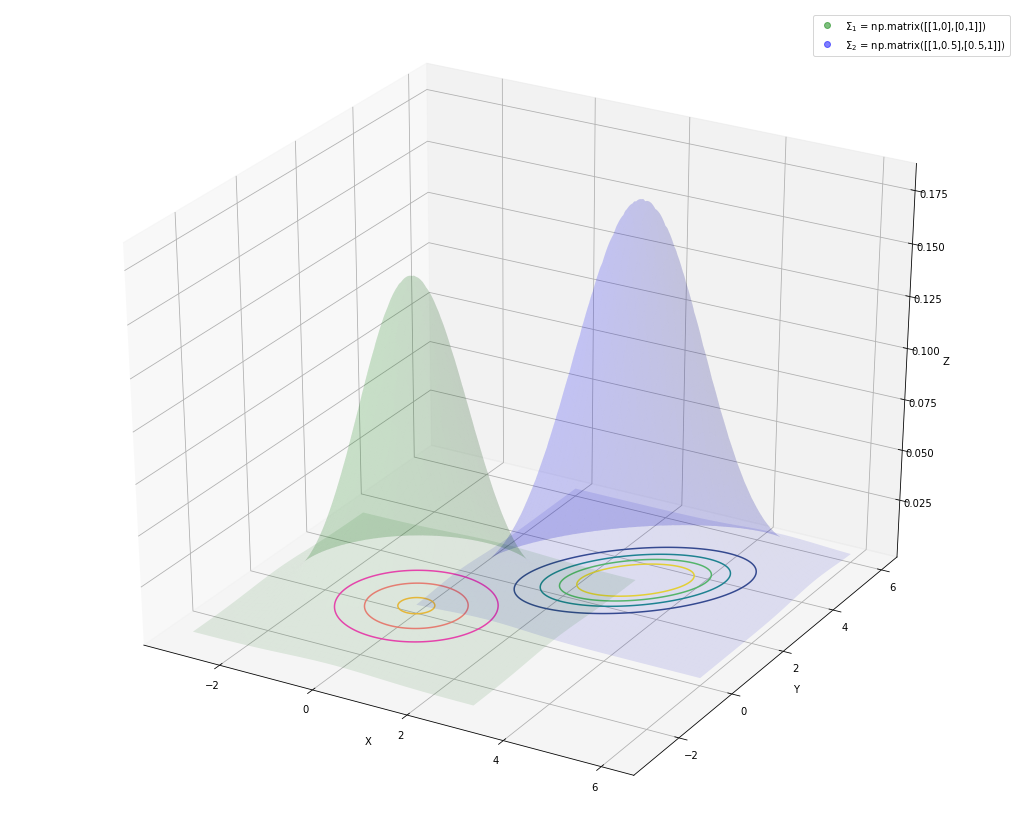

In [106]:
mu_1 = np.array([0,0])
mu_2 = np.array([3,3])
sigma_1 = np.matrix([[1, 0], [0, 1]])
sigma_2 = np.matrix([[1, 0.5], [0.5, 1]])

fig = plt.figure(figsize=(18, 15))
ax = fig.gca(projection='3d')
multivariate_normal_plot(mu_1, sigma_1, n=5, step=0.05, color='green', alpha=0.1, cmap=cm.spring)
multivariate_normal_plot(mu_2, sigma_2, n=5, step=0.03, width= 3, color='blue', alpha=0.1, cmap=cm.viridis)

# Legend
legend_kwargs = dict(linestyle='none', alpha=0.5, marker='o')
fake2Dline1 = mpl.lines.Line2D([0], [0], c='green', **legend_kwargs)
fake2Dline2 = mpl.lines.Line2D([0], [0], c='blue', **legend_kwargs)
label = ['$\Sigma_1$ = np.matrix([[1,0],[0,1]])', '$\Sigma_2$ = np.matrix([[1,0.5],[0.5,1]])']
ax.legend([fake2Dline1, fake2Dline2], label, numpoints=1)

plt.show()

#### Models in Higher Dimension

Recall what we have learned so far:

- The purpose is to classify based on numerical features, so we want to compute the probability of being in class $k \text{ under the condition that } X=x: \ P(Y=k \ | \ X=x)$

- By Bayes theorem we can re-express the conditional probability as below:
$$
P(Y=k \ | \ X=x) = \frac{p(X=x \ | \ Y=k) P(Y=k)}{\sum_{l}p(X=x \ | \ Y=l) P(Y=l)}
$$
so we only need to decide:
    - prior probability
    - the probability distribution of the feature in each class
    
- While estimating the **prior** is easy; estimating the distribution in each class is often hard

**The Assumptions on the Discriminatic Models in  Higher Dimension**

To estimate the distribution in each class, we need to make some additional assumptions. The ones below are shared by **LDA**, **QDA** and **GNB**:

- The distribution in each class is Gaussian (i.e. normal).
- Each Gaussian distribution centers at a possibly different position. (How do we find the centers?)

It is the different assumptions on the **covariant matrix** which differentiate these three models:

- LDA assumes every class has the **same covariance shape**; LDA allows **correlation** (off-diagonal entries).
- QDA allow **different covariance shape** for each class; QDA allows **correlation** (off-diagonal entries).
- GNB allow **different covariance shape** for each class; GNB requires **uncorrelated** features (diagonal covariance).

To illustrate the differences, let's consider the two-dimensional sample below:

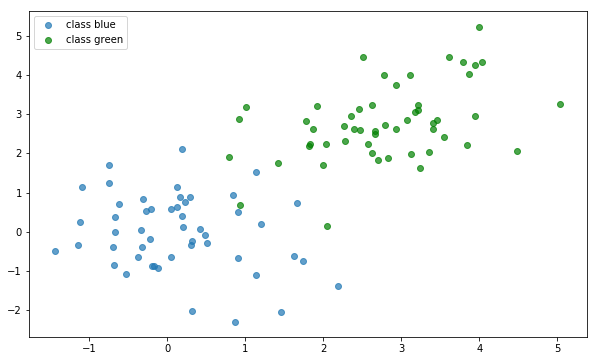

In [109]:
show_sample()
plt.show()

**QDA** 

We start with QDA. For this particular example, we need to compute the blue class conditional probability density:

$$
p(X=x \ | \ Y=b) = \frac{1}{(2\pi)|\Sigma_b|^{1/2}}exp\big[{-\frac{1}{2}(x-\mu_b)^T\Sigma_b^{-1}(x-\mu_b)}\big]
$$

and the green class conditional probability density,

$$
p(X=x \ | \ Y=g) = \frac{1}{(2\pi)|\Sigma_g|^{1/2}}exp\big[{-\frac{1}{2}(x-\mu_g)^T\Sigma_g^{-1}(x-\mu_g)}\big]
$$

- How do we estimate $\mu_b \text{, } \mu_g \text{, } \Sigma_b \text{ and } \Sigma_g \text{?}$

The training data we have is:
$$
\text{class blue } = 
\begin{bmatrix}
(x^b_1, y^b_1)\\
(x^b_2, y^b_2)\\
\vdots \\
(x^b_{50}, y^b_{50})\\
\end{bmatrix}
\quad \text{ and } \quad
\text{class green}=
\begin{bmatrix}
(x^g_1, y^g_1)\\
(x^g_2, y^g_2)\\
\vdots \\
(x^g_{53}, y^g_{53})\\
\end{bmatrix}
$$

**Questions**
- How do we compute $\hat{\mu}_b$ and $\hat{\mu}_g$?
- The covariance matrices are given by:
$$
\hat{\Sigma}_b =
\begin{bmatrix}
V_x^b & cov^b_{x, y} 
\\[0.3em]
cov^b_{y, x} & V^b_y
\end{bmatrix}
$$
What do the parameters mean? How do we compute these parameters?
- What about
$$
\hat{\Sigma}_g =
\begin{bmatrix}
V_x^g & cov^g_{x, y} 
\\[0.3em]
cov^g_{y, x} & V^g_y
\end{bmatrix}
$$

**LDA**

We need to compute, for each $k:$ 
$$
p(X=x \ | \ Y=k) = \frac{1}{(2\pi)|\Sigma|^{1/2}}exp\big[{-\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}(x-\mu_k)}\big]
$$

**Estimation**
- We compute $\hat{\mu}_b \text{ and } \hat{\mu}_g$ in the same way as before
- We have

$$
\quad\\
\hat{\Sigma} 
=\sum_{k\in \{b, g\}}\frac{n_k-1}{n-K}\cdot\hat{\Sigma}_k
$$

**GNB**

While the mean can be estimated in the same way, we need to estimate the covariance matrix for each $k:$ 
$$
\quad \\
p(X=x \ | \ Y=k) = \frac{1}{(2\pi)|\Sigma_k|^{1/2}}exp\big[{-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)}\big]
$$

- We still have
$$
\Sigma_b =
\begin{bmatrix}
V_x^b & cov^b_{x, y} 
\\[0.3em]
cov^b_{y, x} & V^b_y
\end{bmatrix}
$$
and
$$
\Sigma_g =
\begin{bmatrix}
V_x^g & cov^g_{x, y} 
\\[0.3em]
cov^g_{y, x} & V^g_y
\end{bmatrix}
$$

**Questions**

- What's the difference (simplification) from QDA?

**Answer**

- GNB assumes
$$
\Sigma_b =
\begin{bmatrix}
V_x^b & 0 
\\[0.3em]
0 & V^b_y
\end{bmatrix}
$$
and
$$
\Sigma_g =
\begin{bmatrix}
V_x^g & 0 
\\[0.3em]
0 & V^g_y
\end{bmatrix}
$$

Recall that GNB stands for **Gaussian Naive Bayes** classifier. The name indicates a Bayes classifier with Gaussian distribution. The assumption of Gaussian distribution, together with **mutually independent** features, implies that the features are uncorrelated. This is what the adjective **Naive** stands for.

<p><a name="discriminant-sklearn"></a></p>
## Discriminant Analysis in  Scikit-Learn

**Define some helper functions:**

In [42]:
def data_1Dplot(x, y, xlabel=None, ylabel=None, labels=None, title=None):
    ## scatter plot the data
    plt.scatter(x, y, c=y, s=50, alpha=0.6)
    ## set labels
    if not xlabel is None:
        plt.xlabel(xlabel, size=12)
    if not ylabel is None:
        plt.ylabel(ylabel, size=12)
    ## set ticks for y
    y_ticks = np.unique(y)
    if not labels is None:
        plt.yticks(y_ticks, labels, rotation='vertical', size=12)
    ## set title
    if not title is None:
        plt.title(title, size=16)
        
def lda_1Dplot(x, model):
    x = np.array(x)
    num = 10000
    x = np.linspace(start=min(x), stop=max(x), num=num).reshape(num,1)
    plt.plot(x, model.predict(x), lw=2)
    for i in range(len(LDA.predict_proba(x)[0])):
        plt.plot(x, model.predict_proba(x)[:,i], ls='--', lw=2)

def plotModel(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should arrays
    label: true label
    '''
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    import matplotlib.pyplot as pl
    from matplotlib import colors
    colDict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', colDict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, nx),
        np.linspace(y_min, y_max, ny)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters ans true labels
    plt.scatter(x, y, c = label)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

We demonstrate **LDA** in `sklearn` with the tumor data.

In [112]:
#### Load the data if you haven't done so

path_to_file = "./data/pml2tumor.csv"
data = pd.read_csv(path_to_file)
x_tm = data[["Size"]]
y_tm = data["Malignant"]

- Build the LDA model on the tumor data

In [113]:
from sklearn import discriminant_analysis

#### Your code here, name your model object LDA


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

- The score (accuracy) of your model


In [114]:
LDA.score(x_tm, y_tm)

0.91666666666666663

- Predict with the LDA model:

In [115]:
LDA.predict(x_tm)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

- Plot the decision boundary

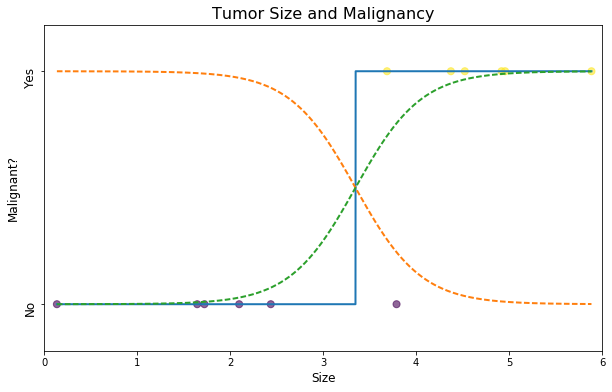

In [117]:
## Plot data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm, y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot LDA prediction probabilities
lda_1Dplot(x_tm, LDA)
plt.axis([0, 6, -.2, 1.2])
plt.show()

<p><a name="ex3"></a></p>
#### Exercise 3

We will work on the `iris` data

In [118]:
#### Load the data if you haven't done so

from sklearn import datasets
iris = datasets.load_iris()
pair = (2, 3)

xlabel = iris.feature_names[pair[0]]
ylabel = iris.feature_names[pair[1]]

iris_x = iris.data[:, pair]
iris_y = iris.target

- Fit a LDA model with all features of iris dataset, what's your overall accuracy?

In [44]:
#### Your code here, still call your model object LDA
from sklearn import discriminant_analysis
LDA = discriminant_analysis.LinearDiscriminantAnalysis()

LDA.fit(iris_x, iris_y)
print(LDA.score(iris_x, iris_y))

0.96


- We now select two features at a time and visualize the LDA decision boundaries. Check the output plots.

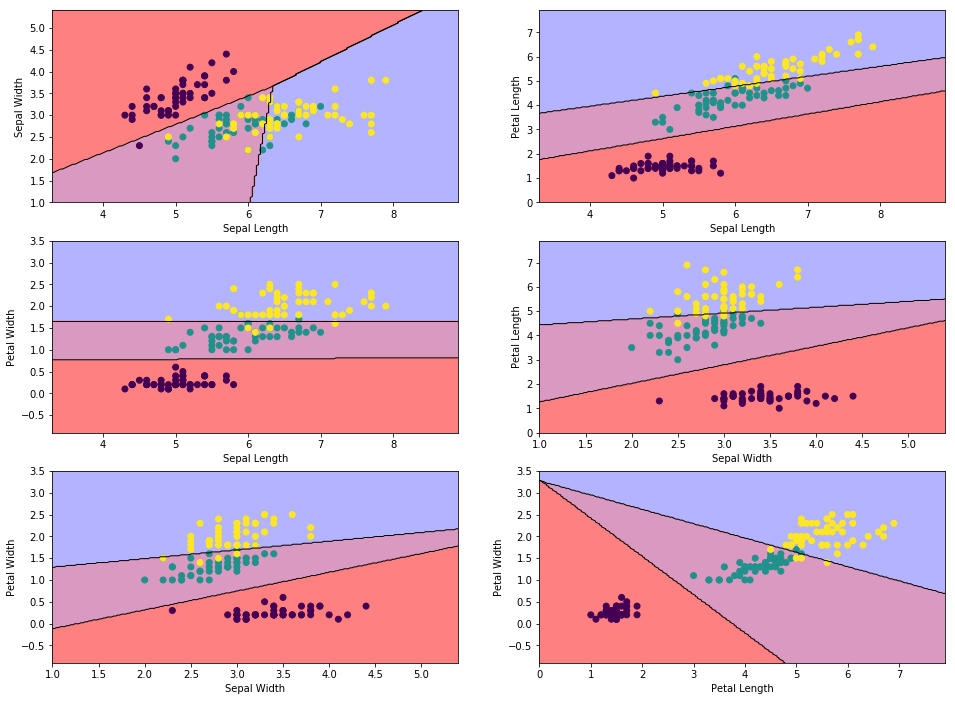

In [45]:
plt.rcParams['figure.figsize'] = 16, 12
labels = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width" ]

def pairPlot(model, i, j):
    model.fit(iris.data[:, [i, j]], iris.target)
    plot_model(model, iris.data[:, i], iris.data[:, j], iris.target)
    plt.xlabel(labels[i])
    plt.ylabel(labels[j])
    
plt.subplot(321)
pairPlot(LDA, 0, 1)

plt.subplot(322)
pairPlot(LDA, 0, 2)

plt.subplot(323)
pairPlot(LDA, 0, 3)

plt.subplot(324)
pairPlot(LDA, 1, 2)

plt.subplot(325)
pairPlot(LDA, 1, 3)

plt.subplot(326)
pairPlot(LDA, 2, 3)

plt.show()

<p><a name="ex4"></a></p>
#### Exercise 4

- Create a QDA model and train it with the iris data.

In [58]:
#### Your code here, name your model object QDA
from sklearn import discriminant_analysis
QDA = discriminant_analysis.QuadraticDiscriminantAnalysis()

QDA.fit(iris_x, iris_y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

- What is the accuracy of your model?

In [59]:
print(QDA.score(iris_x, iris_y))

0.98


- Below we visualize the decision boundary for each pair of features.

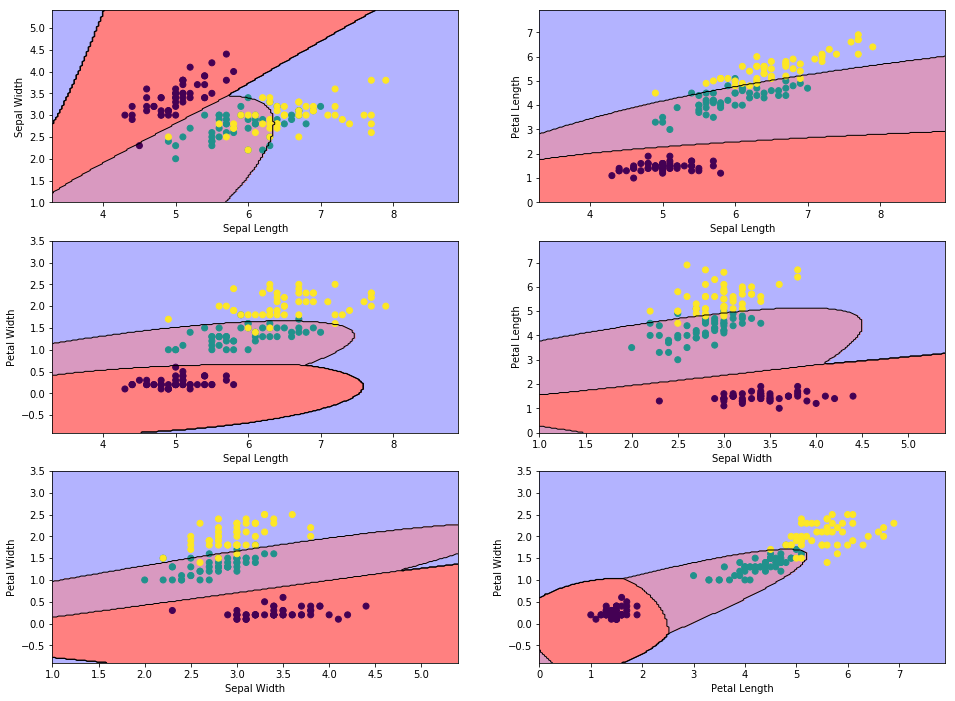

In [60]:
plt.rcParams['figure.figsize'] = 16, 12
plt.subplot(321)
pairPlot(QDA, 0, 1)

plt.subplot(322)
pairPlot(QDA, 0, 2)

plt.subplot(323)
pairPlot(QDA, 0, 3)

plt.subplot(324)
pairPlot(QDA, 1, 2)

plt.subplot(325)
pairPlot(QDA, 1, 3)

plt.subplot(326)
pairPlot(QDA, 2, 3)

plt.show()

<p><a name="nb"></a></p>
## Naive Bayes

Recall that the Bayes theorem assert, given $X=x$, that the probability the output being in class $k$ can be estimated by:

$$
Pr(Y=k|X=x) = \frac{f_k(x)\pi_k}{\sum_{l}f_l(x)\pi_l},
$$

$\pi_l = P(Y=k)$, and $f_k(x) = P(x|Y=k)$

LDA and QDA use multivariate Gaussian densities (but with different assumptions on their covariance matrices). These do not work well when the number of features is large.

Naive Bayes models assume that the different features are conditionally independent in each class so can work with dataset of large number of features.

The *naive Bayes classifier* is based on Bayes theorem with the additional independence assumptions between predictors.

The assumption of conditional independence requires the class $k$ probability density to factorize:

$$
f_k(x) = \prod_{j=1}^{p}f_{jk}(x)
$$
where $f_{jk}(x)$ is the probability density for the *j*th feature $X_j$ in class $k$.

We will introduce three kinds of Naive Bayesian models:
- *Gaussian Naive Bayes*
- *Multinomial Naive Bayes*
- *Bernoulli Naive Bayes*

<p><a name="gnb"></a></p>
### Gaussian Naive Bayes (GNB)
Gaussian Naive Bayes assumes each feature follows a gaussian distribution ($\Sigma_k$ is diagonal):

$$
f_{jk}(x) = \frac{1}{\sqrt{2\pi}\sigma_{jk}}exp\big[-\frac{(x_j-\mu_{jk})^2}{2\sigma_{jk}^2}\big]
$$
where:
- $\mu_{jk}$: the mean of the *j*th feature $x_j$ in class $k$
- $\sigma_{ij}$: the variance of the *j*th feature $x_j$ in class $k$

Since we assume gaussian densities, it's best used for continuous features.

`GaussianNB` implements the Gaussian Naive Bayes algorithm for classification.

<p><a name="gnb-sklearn"></a></p>
### Gaussian Naive Bayes in Scikit-Learn

**Exercise**

We will work on the iris data. Fit a Gaussian Naive Bayes model and print out its accuracy:

In [63]:
from sklearn import naive_bayes
gnb = naive_bayes.GaussianNB()

#### Your code here

gnb.fit(iris_x, iris_y)
print(gnb.score(iris_x, iris_y))


0.96


- Use `predict()` and `predict_proba()` methods to predict the new data point `x_new = [2.8, 5.6, 3.2, 6.7]`.

In [71]:
#### Your code here
x_new = pd.DataFrame([2.8, 5.6], [3.2, 6.7])

print(gnb.predict_proba(x_new))
print(gnb.predict(x_new))
#classification: [2]
#probability: [[  0.00000000e+000   1.26443199e-100   1.00000000e+000]]

[[1.25301535e-131 1.07699886e-007 9.99999892e-001]
 [0.00000000e+000 2.69641533e-068 1.00000000e+000]]
[2 2]


- Below we visualize the decision boundary for each pair of features.

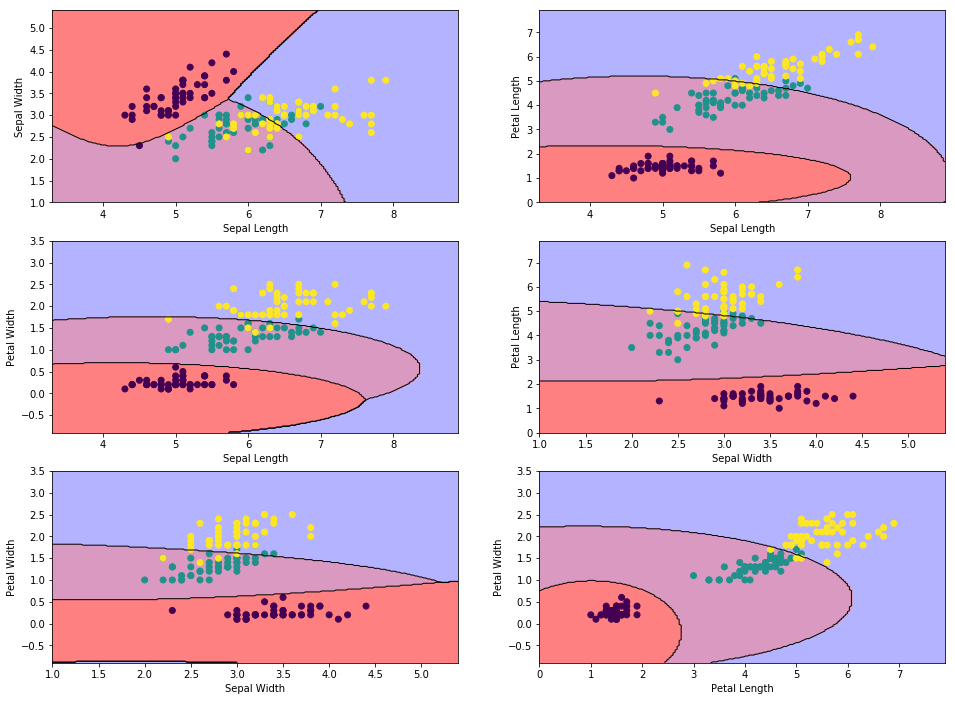

In [72]:
plt.rcParams['figure.figsize'] = 16, 12
plt.subplot(321)
pairPlot(gnb, 0, 1)

plt.subplot(322)
pairPlot(gnb, 0, 2)

plt.subplot(323)
pairPlot(gnb, 0, 3)

plt.subplot(324)
pairPlot(gnb, 1, 2)

plt.subplot(325)
pairPlot(gnb, 1, 3)

plt.subplot(326)
pairPlot(gnb, 2, 3)

plt.show()

<p><a name="compare"></a></p>

### Bernoulli, Binomial and Multinomial Distributions
- Bernoulli distribution models an unfair two-sided coin-flip $1$ time
- Binomial distribution models independent (un)fair two-sided coin-flips $N$ times
- Multinomail distribution models independent $k$-sided (un)fair coin-flips $N$ times

### Summary

- Given a binary random variable with values in $\{'H', 'T'\}$, the Bernoulli distribution models the probabilities of taking 'head', $p$, and taking 'tail', $1-p$.
- Suppose that we flip the (unfair) coin $N$ times independently, we are interested in the frequency counts of the heads and the tails. The Binomial distribution models the number of heads in terms of $N$ and $p$.
- Suppose that we flip an $M$-sided coin $N$ times independently (this resembles $N$ independent samples of a $M$-level categorical variable), we are interested in knowing the frequency count of the dice taking any particular side. The Multinomial distribution models the counts of all $M$ faces, given the probabilities of drawing the $m$-th side, $p_m, 1\leq k \leq M$, $\sum_{m\leq M}p_m=1$.
- When $M=2$, the multinomial distribution is reduced back to a binomial distribution
- The binomial distribution models the repeatedly independent random draws of a *Bernoulli distribution*
- The multinomial distribution models the repeatedly independent random draws of a *Categorical distribution*

<p><a name="mnb"></a></p>
### Multinomial Naive Bayes
For categorical data, the Gaussian (normality) assumption is not realistic.
If the columns of the raw data are categorical within the same finite range, then we can use the distinct discrete values as the features and compute the frequency count of the appearance of each feature. With this understood, then we can parameterize the probability distribution by a vector $\theta_{k} = ({\theta_{k1}}, {\theta_{k2}}, ..., {\theta_{kF}})$ for each class $k$,

where:
- $F$: the number of features. 
- ${\theta_{kf}}$: the probability $P(x_f|k)$ of the $f-th$ feature occurs in the samples labeled by class $k$.
- Fixing a class label $k$, *MultinomialNB* implements the naive Bayes algorithm for multinomially distributed data, and is widely used in *text classification (text categorization)*, where the term *naive* means independence of the appearance of distinct text tokens.
- In the context of *text classification*, the positions within the documents are the raw features and the different tokens (normalized words) are the discrete categories.
- In such context, we model the word/token counts in the multinomial Naive Bayes.
- Then the $\theta_{kf}, 1\le f \le F$ captures the relative frequency count of the text token in the class $k$ documents.

**Multinomial Naive Bayes Example**

- In our spam email data, for simplicity we choose three words (features) to build our model: "sale", "money", "work", denoted by $x_1, x_2, x_3$, respectively.

- Among all the spams, the word "sale" appears $48$ times, "money" appears $50$ times,  and "work" appears $2$ times. $100$ in total.
Then we have:
$$\theta_1 = \{0.48, 0.50, 0.02 \}$$

- In the non-spams, the frequency count of $x_1, x_2, x_3$ are $5$, $10$, $85$.
Then we have:
$$\theta_0 = \{0.05, 0.10, 0.85 \}$$

- Each document (spam or non-spam) can be viewed as repeatedly draws from a bag of 'sale', 'money' and 'work', specified by $\theta_0$ or $\theta_1$. 

<p><a name="mnb-sklearn"></a></p>
### Multinormial Naive Bayes in Scikit-Learn

The file "spam_train.csv" in the "data" folder contains 2300 emails and 58 variables. The last variable "spam" is binary with two levels: "email", "spam". If you want to know more about the data set, please read the file "spam.txt".

We will try to build a multinomial NB classifier based on this data set, using the first 57 features to predict the "spam" variable.

In [75]:
train = pd.read_csv('./data/spam_train.csv')
## separate the predictors and response in the training data set
x = np.array(train.iloc[:, 0:57])
y = np.ravel(train.iloc[:, 57:58])
train.head()

,A.1,A.2,A.3,A.4,A.5,A.6,A.7,A.8,A.9,A.10,...,A.49,A.50,A.51,A.52,A.53,A.54,A.55,A.56,A.57,spam
0,0.32,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.0,0.234,0.0,0.058,0.0,0.0,1.068,3,47,email
1,0.00,0.0,0.71,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.342,0.0,0.0,1.000,1,31,email
2,0.00,0.0,0.00,0.0,0.00,0.17,0.0,0.0,0.0,0.0,...,0.0,0.055,0.0,0.000,0.0,0.0,1.685,7,204,email
3,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.0,0.0,1.800,5,9,email
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.471,0.0,0.000,0.0,0.0,1.424,8,47,email


In [76]:
y == 'spam'

array([False, False, False, ..., False, False,  True])

In [77]:
print("     spam:", np.sum(y == 'spam'))
print("None spam:", np.sum(y != 'spam'))

     spam: 911
None spam: 1389


- Create a multinomial naive Bayes model and train it with the data above. What is the accuracy of the model?

In [78]:
#### Your code here

from sklearn import naive_bayes
mnb = naive_bayes.MultinomialNB()
mnb.fit(x, y)
print("The score of multinomial naive bayes is: " + str(mnb.score(x, y)))

The score of multinomial naive bayes is: 0.8108695652173913


**Demonstration**

As naive bayes is widely used for spam filtering, we expect a result much better than 81%! 

A commonly used technique is to perform feature selection (trying **fewer** features)!

Previously, we have used 57 features, not all of them are correlated with the response variable. So this time we choose only the first 48 features and see what will happen.

In [79]:
x_48 = x[:, 0:48]
mnb.fit(x_48 , y)
print(mnb.score(x_48, y))

0.871304347826087


Since accuracy doesn't increase with the number of features, we add features incrementally by their order and inspect the variations of the accuracy.

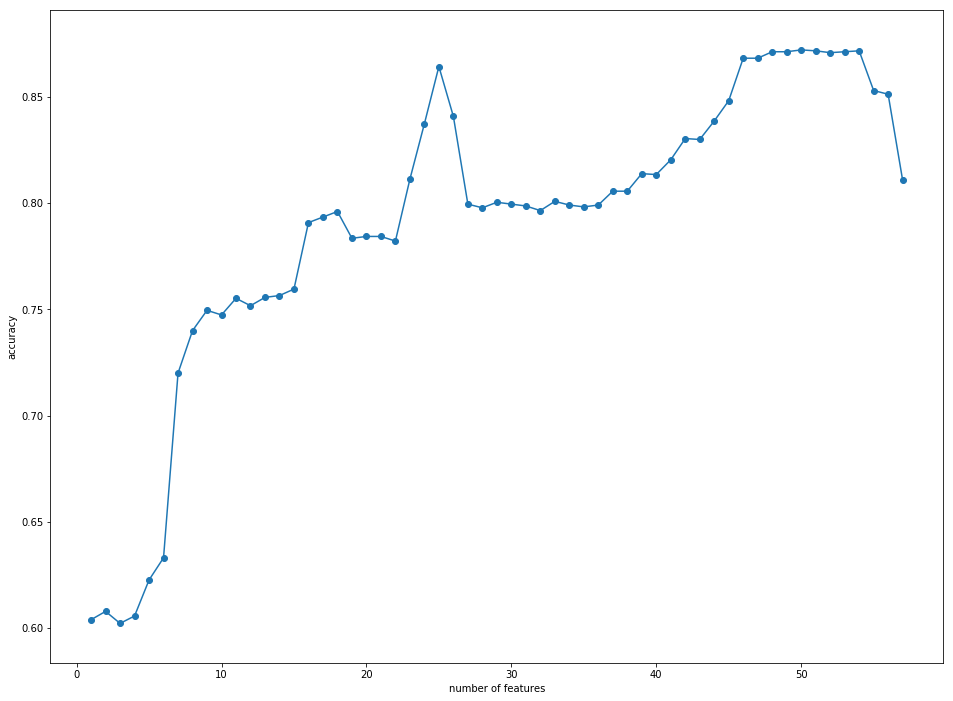

In [80]:
n = range(1, 58)
accuracy = []
for i in n:
    mnb.fit(x[:, 0:i] , y)
    accuracy.append(mnb.score(x[:, 0:i] , y))
import matplotlib.pyplot as plt
plt.scatter(n, accuracy)
plt.plot(n, accuracy)
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.show()

As the features increase, the training accuracy increases dramatically at first. It reaches the peak at $k$=47, then adding more features does not increase its accuracy, and the accuracy begins to decrease at about $k=54$.
It seems that including all features does not ensure a better result.

We will discuss feature selection and regularization in a separate session.

<p><a name="bnb"></a></p>
### Bernoulli Naive Bayes

- Bernoulli Naive Bayes is used for the data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (boolean) variable

- Consider the spam filter problem, in Bernoulli naive Bayes we do not care about the frequency any more. We are just interested at the appearance or non-appearance. 

- Given a feature $x_k$ representing a token/word, we focus on whether it appears in an email or not? What's the probability of its appearance?

`BernoulliNB` implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable

**Bernoulli Naive Bayes Example**

Suppose we have 80 non-spams in which the word "sale", denoted by $x_k$, appears in $10$ of them; we also have 20 spams in which $x_k$ appears among $16$ of them. We use $y=1$ to indicate a spam email. Then:
$$
\begin{align}
p(x_k = 1 | y = 1) &= \frac{16}{20} = \frac{4}{5},  \quad p(x_k = 0 | y = 1) = \frac{1}{5} \\
p(x_k = 1 | y = 0) &= \frac{10}{80} = \frac{1}{8},  \quad p(x_k = 0 | y = 0) = \frac{7}{8} 
\end{align}
$$

Given a new email which contains the word "sale", namely $x_k=1$. If we just use this one feature to predict:
$$
p(y=1 | x_k=1) = \frac{p(y=1)p(x_k=1|y=1)}{p(x_k=1)} = \frac{\frac{20}{100} \times \frac{4}{5}}{p(x_k=1)} = \frac{0.16}{p(x_k=1)}
\\
p(y=0 | x_k=1) = \frac{p(y=0)p(x_k=1|y=0)}{p(x_k=1)} = \frac{\frac{80}{100} \times \frac{1}{8}}{p(x_k=1)} = \frac{0.1}{p(x_k=1)}
$$

Since $p(y=1|x_k=1) > p(y=0|x_k=1)$, we will conclude that this email is a spam.

<p><a name="bnb-sklearn"></a></p>
### Bernoulli Naive Bayes in Scikit-Learn

- Train a BNB model with the data. Report the accuracy.

In [82]:
## create a instance 
bnb = naive_bayes.BernoulliNB()
## fit model
bnb.fit(iris.data, iris.target)
## print out the mean accuracy
print("The mean accuracy of Bernoulli Naive Bayes is: " + str(bnb.score(iris.data, iris.target)))

The mean accuracy of Bernoulli Naive Bayes is: 0.3333333333333333


**Demonstration** 

Note that Bernoulli naive Bayes performs poorly here (worse than the random guess). 
The algorithm converts continuous features to binary features using the default cut-off 0.0 (controlled by the default value of binarize = 0.0)
We may need to discretize the feature values into two distinct levels in a controlled manner. In order to do this, set the argument "binarize" to be $1.5$ manually, the algorithm will treat $1.5$ as a threshold and cut off the variables into binary data:
If we set binarize = None, the algorithm will treat the data as being pre-binarized already

In [83]:
bnb.set_params(binarize = 1.5)
## fit model again
bnb.fit(iris.data, iris.target)
## print out the mean accuracy
print("The mean accuracy of Bernoulli Naive Bayes is: " + str(bnb.score(iris.data, iris.target)))

The mean accuracy of Bernoulli Naive Bayes is: 0.86


Now the prediction is much better, the accuracy reaches up to 86% from 33.3%.

Next we may consider to search for a better threshold: Let's do a for loop and try to find it.

In [70]:
accuracy = []
line = np.linspace(start=0, stop=8, num=100)
for i in line:
    bnb.set_params(binarize = i)
    bnb.fit(iris.data, iris.target)
    accuracy.append(bnb.score(iris.data, iris.target))
    
accuracy = np.array(accuracy)
print("The highest accuracy is: " + str(accuracy.max()))
print("The corresponding threshold is: " + str(line[accuracy.argmax()]))

The highest accuracy is: 0.946666666667
The corresponding threshold is: 1.77777777778


We see that when the threshold is around 1.778, the mean accuracy can reach up to 94.67%! So that a better threshold is crucial. In practice, we may need to set a threshold for each input variable to make a better prediction.